# Previa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creo un dataframe general y lo ordeno por fechas
df = pd.read_csv('/content/drive/MyDrive/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')
df = df.sort_values('date').reset_index(drop=True)
df = df[df['date'] < '2022/08/01']
df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,MN,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,IN,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,LA,2020/01/01,0,0,1,0,0,1,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,NC,2020/01/01,0,0,1,0,0,1,0.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [ ]:
df.isna().sum()

state                                                         0
date                                                          0
critical_staffing_shortage_today_yes                          0
critical_staffing_shortage_today_no                           0
critical_staffing_shortage_today_not_reported                 0
                                                           ... 
staffed_icu_pediatric_patients_confirmed_covid_coverage       0
staffed_pediatric_icu_bed_occupancy                        8303
staffed_pediatric_icu_bed_occupancy_coverage                  0
total_staffed_pediatric_icu_beds                           8319
total_staffed_pediatric_icu_beds_coverage                     0
Length: 135, dtype: int64

In [ ]:
# Lleno los valores NaN con 0 para evitar problemas de calculo
for i in df:
  df[i] = df[i].fillna(0)

In [ ]:
df.isna().sum()

state                                                      0
date                                                       0
critical_staffing_shortage_today_yes                       0
critical_staffing_shortage_today_no                        0
critical_staffing_shortage_today_not_reported              0
                                                          ..
staffed_icu_pediatric_patients_confirmed_covid_coverage    0
staffed_pediatric_icu_bed_occupancy                        0
staffed_pediatric_icu_bed_occupancy_coverage               0
total_staffed_pediatric_icu_beds                           0
total_staffed_pediatric_icu_beds_coverage                  0
Length: 135, dtype: int64

# Cuestionario

Para guiar nuestro trabajo, nuestro Team Líder nos facilita un cuestionario. Entonces, usando los datos ingestados anteriormente debemos responder:

## 1. ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?


In [ ]:
# Creo un dataframe con las columnas que voy a necesitar
df_camas = df[['state', 'date', 'total_adult_patients_hospitalized_confirmed_covid', 'total_pediatric_patients_hospitalized_confirmed_covid', 'inpatient_beds_used_covid']]
df_camas.head()

,state,date,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds_used_covid
0,MN,2020/01/01,0.0,0.0,0.0
1,IN,2020/01/01,0.0,0.0,0.0
2,PR,2020/01/01,0.0,0.0,0.0
3,LA,2020/01/01,0.0,0.0,0.0
4,NC,2020/01/01,0.0,0.0,0.0


In [ ]:
# Creo la nueva columna con la suma
df_camas['total_camas'] = df_camas['total_pediatric_patients_hospitalized_confirmed_covid'] + df_camas['total_adult_patients_hospitalized_confirmed_covid']
# Creo un dataframe para el primer semestre
df_primer_semestre = df_camas[df_camas['date']<'2020/07/01']
df_primer_semestre.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,date,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds_used_covid,total_camas
6689,PA,2020/06/30,0.0,0.0,842.0,0.0
6690,OH,2020/06/30,0.0,0.0,1289.0,0.0
6691,RI,2020/06/30,0.0,0.0,45.0,0.0
6692,WY,2020/06/30,0.0,0.0,12.0,0.0
6693,UT,2020/06/30,0.0,0.0,259.0,0.0


In [ ]:
# Agrupo por estado y llamo al top 5 (total de camas calculado)
df_primer_semestre[['state', 'total_camas']].groupby('state').sum(min_count=1).sort_values(by='total_camas', ascending=False).head()

,total_camas
state,
LA,40452.0
CA,36134.0
NV,20134.0
AZ,5177.0
IA,3174.0


In [ ]:
# LLamo al top 5 con la columna precalculada para contrastar los resultados
df_primer_semestre[['state', 'inpatient_beds_used_covid']].groupby('state').sum(min_count=1).sort_values(by='inpatient_beds_used_covid', ascending=False).head()

,inpatient_beds_used_covid
state,
NY,686528.0
CA,434721.0
FL,322227.0
TX,246237.0
IL,214010.0


## 2. Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

  * Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)


In [ ]:
# Creo un dataframe para el estado de Nueva York
df_ny = df_camas.loc[df['state'] == 'NY']
df_ny.head()

,state,date,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds_used_covid,total_camas
1063,NY,2020/03/14,0.0,0.0,6.0,0.0
1077,NY,2020/03/15,0.0,0.0,88.0,0.0
1152,NY,2020/03/16,0.0,0.0,97.0,0.0
1172,NY,2020/03/17,0.0,0.0,128.0,0.0
1243,NY,2020/03/18,0.0,0.0,174.0,0.0


In [ ]:
# Creo un dataframe para la etapa de cuarentena (2020/03/22 - 2021/06/13 para el estado de nueva york)
df_ny_q = df_ny.loc[(df_ny['date'] > '2020/03/22') & (df_ny['date'] < '2021/06/13')]
df_ny_q.head()

,state,date,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds_used_covid,total_camas
1449,NY,2020/03/23,0.0,0.0,417.0,0.0
1514,NY,2020/03/24,0.0,0.0,554.0,0.0
1546,NY,2020/03/25,0.0,0.0,843.0,0.0
1592,NY,2020/03/26,0.0,0.0,992.0,0.0
1656,NY,2020/03/27,0.0,0.0,1205.0,0.0


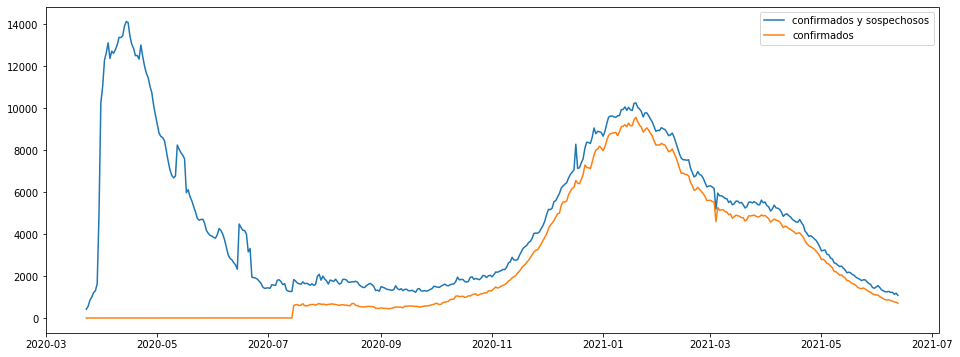

In [ ]:
from datetime import datetime
date_objects = [datetime.strptime(date, '%Y/%m/%d').date() for date in df_ny_q['date']]

ax, fig = plt.subplots(figsize=(16, 6))
ax = plt.plot(date_objects, df_ny_q['inpatient_beds_used_covid'], label='confirmados y sospechosos');
ax = plt.plot(date_objects, df_ny_q['total_camas'], label='confirmados');
plt.legend()

In [ ]:
df_ny_q[df_ny_q['inpatient_beds_used_covid']==df_ny_q['inpatient_beds_used_covid'].max()]

,state,date,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,inpatient_beds_used_covid,total_camas
2604,NY,2020/04/14,0.0,0.0,14126.0,0.0


## 3. ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.



In [ ]:
# Creo un dataframe particular para la ocupacion de UCI del año 2020
df_icu = df[['state', 'date', 'total_staffed_adult_icu_beds', 'staffed_icu_adult_patients_confirmed_covid', 'total_staffed_pediatric_icu_beds', 'staffed_icu_pediatric_patients_confirmed_covid', ]]
df_icu['total_icu'] = df_icu['total_staffed_adult_icu_beds'] + df_icu['total_staffed_pediatric_icu_beds']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_icu_2020 = df_icu[df_icu['date']< '2021/01/01']
df_icu_2020.head()

,state,date,total_staffed_adult_icu_beds,staffed_icu_adult_patients_confirmed_covid,total_staffed_pediatric_icu_beds,staffed_icu_pediatric_patients_confirmed_covid,total_icu
0,MN,2020/01/01,0.0,0.0,0.0,0.0,0.0
1,IN,2020/01/01,0.0,0.0,0.0,0.0,0.0
2,PR,2020/01/01,0.0,0.0,0.0,0.0,0.0
3,LA,2020/01/01,0.0,0.0,0.0,0.0,0.0
4,NC,2020/01/01,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_icu_2020.groupby('state')['total_icu'].sum().sort_values( ascending=False).head()

state
CA    1639800.0
TX    1237830.0
FL    1174171.0
NY    1051551.0
OH     794095.0
Name: total_icu, dtype: float64

## 4.  ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?



In [ ]:
# Creo un dataframe sobre las camas de pacientes pediatricos para el año 2020
df_pediatrico = df[['state', 'date', 'total_pediatric_patients_hospitalized_confirmed_covid']]
df_pediatrico = df_pediatrico[df_pediatrico['date']< '2021/01/01']
df_pediatrico = df_pediatrico[['state', 'total_pediatric_patients_hospitalized_confirmed_covid']]

In [ ]:
df_pediatrico.groupby('state')['total_pediatric_patients_hospitalized_confirmed_covid'].sum()

state
AK      351.0
AL     2879.0
AR     1698.0
AZ     5710.0
CA     9909.0
CO     3209.0
CT      598.0
DC      934.0
DE      538.0
FL     7411.0
GA     5049.0
HI       98.0
IA      692.0
ID      487.0
IL     5254.0
IN     1465.0
KS      514.0
KY      996.0
LA      745.0
MA     1390.0
MD     1062.0
ME      200.0
MI     1724.0
MN     2027.0
MO     3050.0
MS      911.0
MT      314.0
NC     2268.0
ND      404.0
NE     2020.0
NH       40.0
NJ     2075.0
NM      497.0
NV     1117.0
NY     4815.0
OH     3133.0
OK     3356.0
OR      511.0
PA     5682.0
PR     1029.0
RI     1111.0
SC     1085.0
SD     1758.0
TN     3860.0
TX    12574.0
UT      978.0
VA     1843.0
VI        3.0
VT        3.0
WA      868.0
WI      611.0
WV      979.0
WY       62.0
Name: total_pediatric_patients_hospitalized_confirmed_covid, dtype: float64

## 5.  ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.



In [ ]:
# Agrego una columna al dataframe creado en el punto 3 para comparar el total de las uci con las ocupadas por covid
df_icu['total_icu_covid'] = df_icu['staffed_icu_adult_patients_confirmed_covid'] + df_icu['staffed_icu_pediatric_patients_confirmed_covid']
df_icu.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,date,total_staffed_adult_icu_beds,staffed_icu_adult_patients_confirmed_covid,total_staffed_pediatric_icu_beds,staffed_icu_pediatric_patients_confirmed_covid,total_icu,total_icu_covid
0,MN,2020/01/01,0.0,0.0,0.0,0.0,0.0,0.0
1,IN,2020/01/01,0.0,0.0,0.0,0.0,0.0,0.0
2,PR,2020/01/01,0.0,0.0,0.0,0.0,0.0,0.0
3,LA,2020/01/01,0.0,0.0,0.0,0.0,0.0,0.0
4,NC,2020/01/01,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_icu_estados = df_icu.groupby('state')['total_icu'].sum().sort_values( ascending=False)
icu_covid_estados = df_icu.groupby('state')['total_icu_covid'].sum().sort_values( ascending=False)
icu_total_vs_covid = df_icu.groupby('state').apply(lambda x: (total_icu_estados/icu_covid_estados)*100)
l = []
for i in total_icu_estados.index:
  l.append(round(float(icu_covid_estados[total_icu_estados.index==i].values/total_icu_estados[total_icu_estados.index==i].values*100), 2))
print(l)

[15.69, 15.81, 12.39, 8.67, 10.79, 10.63, 10.77, 14.65, 13.42, 13.04, 14.11, 13.22, 12.83, 13.03, 12.94, 10.69, 13.16, 13.54, 13.42, 13.0, 12.69, 12.6, 12.33, 12.46, 11.7, 12.72, 12.24, 11.81, 11.53, 13.9, 12.06, 12.05, 12.03, 10.41, 10.61, 9.89, 11.07, 12.69, 13.36, 9.5, 9.34, 10.17, 10.86, 10.01, 9.67, 9.55, 8.99, 8.94, 8.78, 10.38, 11.56, 6.23, 7.71, 0.08]


## 6.  ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?



In [ ]:
# Creo un dataframe para las muertes y otro para filtrar el año
df_deaths = df[['state','date', 'deaths_covid']]
df_deaths_2021 = df_deaths[(df_deaths['date'] > '2020/12/31') & (df_deaths['date'] < '2022/01/01')]
df_deaths_2021.head()

,state,date,deaths_covid
16446,MT,2021/01/01,3.0
16447,NM,2021/01/01,18.0
16448,VA,2021/01/01,42.0
16449,OR,2021/01/01,4.0
16450,RI,2021/01/01,16.0


In [ ]:
# Agrupo por estado, sumo las muertes y llamo al maximo valor
lista_muertes_2021 = df_deaths_2021.groupby('state')['deaths_covid'].sum()
lista_muertes_2021

state
AK      614.0
AL     6390.0
AR     3582.0
AS        0.0
AZ    16250.0
CA    35108.0
CO     2835.0
CT     2725.0
DC      532.0
DE      562.0
FL    26004.0
GA    12338.0
HI      445.0
IA     1876.0
ID     1529.0
IL     7500.0
IN     5846.0
KS     2469.0
KY     7252.0
LA     3624.0
MA     3631.0
MD     4025.0
ME      704.0
MI     9332.0
MN     2377.0
MO     6285.0
MS     3664.0
MT     1172.0
NC    10922.0
ND      334.0
NE     1220.0
NH      520.0
NJ     6889.0
NM     1898.0
NV     4412.0
NY    17620.0
OH    12023.0
OK     4180.0
OR     2412.0
PA    13363.0
PR     4516.0
RI      914.0
SC     6434.0
SD      572.0
TN     9439.0
TX    32889.0
UT      618.0
VA     6479.0
VI       44.0
VT      131.0
WA     3847.0
WI     3665.0
WV     2507.0
WY      496.0
Name: deaths_covid, dtype: float64

In [ ]:
# Llamo al maximo valor para ver cual fue el estado al que corresponde
lista_muertes_2021[lista_muertes_2021.values== lista_muertes_2021.max()]

state
CA    35108.0
Name: deaths_covid, dtype: float64

## 7.  ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?



In [ ]:
df_muertes_staff = df[['state', 'date', 'critical_staffing_shortage_today_yes', 'deaths_covid']]
df_muertes_staff_2021 = df_muertes_staff.loc[(df_muertes_staff['date'] > '2020/12/31') & (df_muertes_staff['date'] > '2022/01/01') ]
df_muertes_staff_2021

,state,date,critical_staffing_shortage_today_yes,deaths_covid
35975,ND,2022/01/02,13,1.0
35976,MI,2022/01/02,40,65.0
35977,DE,2022/01/02,2,2.0
35978,ME,2022/01/02,2,3.0
35979,CO,2022/01/02,26,7.0
...,...,...,...,...
47364,IN,2022/07/31,12,0.0
47365,SD,2022/07/31,1,0.0
47366,NY,2022/07/31,2,7.0
47367,MN,2022/07/31,4,1.0


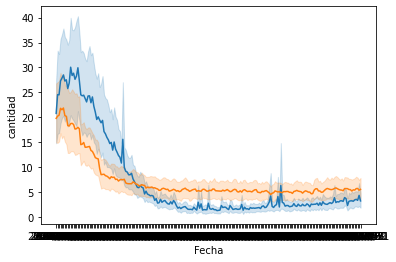

In [ ]:
# Grafico el paralelismo entre las muertes por covid y la falta de personal
sns.lineplot(data=df_muertes_staff, x= df_muertes_staff_2021['date'], y=df_muertes_staff_2021['deaths_covid'], palette='r')
sns.lineplot(data=df_muertes_staff, x= df_muertes_staff_2021['date'], y=df_muertes_staff_2021['critical_staffing_shortage_today_yes'], palette='b').set(xlabel='Fecha', ylabel='cantidad');


In [ ]:
# Calculo la correlación entre las muertes y la falta de personal
np.corrcoef(df_muertes_staff_2021['deaths_covid'], df_muertes_staff_2021['critical_staffing_shortage_today_yes'])[0,1]

0.4626393547296345

## 8.  Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.



In [ ]:
# Creo un dataframe para separar mensualmente los datos
df_mensual = df_deaths
df_mensual['date'] = pd.to_datetime(df_mensual['date'], format='%Y-%m-%d')
df_mensual.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,date,deaths_covid
0,MN,2020-01-01,0.0
1,IN,2020-01-01,0.0
2,PR,2020-01-01,0.0
3,LA,2020-01-01,0.0
4,NC,2020-01-01,0.0


In [ ]:
# Agrupo por año y mes y llamo al mes con mayor cantidad de muertes en todo Estados Unidos
df_mensual_grupo_muertes = df_mensual.groupby([df_mensual['date'].dt.year, df_mensual['date'].dt.month])['deaths_covid'].sum()
df_mensual_grupo_muertes.loc[df_mensual_grupo_muertes == df_mensual_grupo_muertes.max()]

date  date
2021  1       66020.0
Name: deaths_covid, dtype: float64

In [ ]:
# Agrego la columna de icu por covid
df_mensual['total_icu_covid'] = df_icu['total_icu_covid']
df_mensual.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,date,deaths_covid,total_icu_covid
0,MN,2020-01-01,0.0,0.0
1,IN,2020-01-01,0.0,0.0
2,PR,2020-01-01,0.0,0.0
3,LA,2020-01-01,0.0,0.0
4,NC,2020-01-01,0.0,0.0


In [ ]:
# Agrupo por año y mes y llamo al mes con mayor ocupacion de icu en todo Estados Unidos
df_mensual_grupo_icu = df_mensual.groupby([df_mensual['date'].dt.year, df_mensual['date'].dt.month])['total_icu_covid'].sum()
df_mensual_grupo_icu.loc[df_mensual_grupo_icu == df_mensual_grupo_icu.max()]

date  date
2021  1       833015.0
Name: total_icu_covid, dtype: float64

In [ ]:
# Agrego la columna de camas por covid
df_mensual['total_camas'] = df_camas['total_camas']
df_mensual.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,date,deaths_covid,total_icu_covid,total_camas
0,MN,2020-01-01,0.0,0.0,0.0
1,IN,2020-01-01,0.0,0.0,0.0
2,PR,2020-01-01,0.0,0.0,0.0
3,LA,2020-01-01,0.0,0.0,0.0
4,NC,2020-01-01,0.0,0.0,0.0


In [ ]:
# Agrupo por año y mes y llamo al mes con mayor ocupacion de camas en todo Estados Unidos
df_mensual_grupo_camas = df_mensual.groupby([df_mensual['date'].dt.year, df_mensual['date'].dt.month])['total_camas'].sum()
df_mensual_grupo_camas.loc[df_mensual_grupo_camas == df_mensual_grupo_camas.max()]


date  date
2022  1       4244244.0
Name: total_camas, dtype: float64